<a href="https://colab.research.google.com/github/juliancaramuta/Datascience-1/blob/main/Fraude_Tarjetas_Credito_Caramuta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduccion**









Para el presente trabajo se trajo información de distintas transacciones realizadas dentro del periodo 2019-2020 en Estados Unidos, en distintos rubros como centros de educación, comercios, gimnasios, etc. Y también nos informa en que zonas se realizaron estas transacciones y si fue una persona de sexo masculino o femenino.

Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset

Este conjunto de datos proporciona informacion (fecha de transaccion, numero de tarjeta de credito, comercio, categoria, cliente, trabajo del cliente, genero del cliente)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Carga de la Libreria y Datos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/drive/MyDrive/Data Science 1/Fraudes con tarjetas de credito Original.xlsx")
df.head(15)


,Fecha Transaccion,Numero Tarjeta,Mercado,Categoria,Importe,Nombre,Apellido,Genero,Calle Cliente,Ciudad,...,Codigo Postal,Latitud,Longitud,Ciudad POP,Trabajo Cliente,Fecha de nacimiento,Numero de transaccion,Latitud del mercado,Longitud del mercado,Fraude
0,2019-01-01 00:00:18,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,360788.0,-8.117810e+05,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,3.601129e+07,-8.204832e+07,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,488878.0,-1.182105e+06,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,4.915905e+16,-1.181865e+08,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,421808.0,-1.122620e+05,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,4.315070e+07,-1.121545e+08,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,462306.0,-1.121138e+06,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,4.703433e+07,-1.125611e+08,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,384207.0,-7.946290e+05,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,3.867500e+07,-7.863246e+07,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,18917,40375.0,-7.520450e+05,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,4.065338e+07,-7.615267e+15,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,67851,379931.0,-1.009893e+06,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,3.716270e+16,-1.001534e+07,0
7,2019-01-01 00:05:08,6011360759745860,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,22824,388432.0,-7.860030e+05,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,3.894809e+07,-7.854030e+07,0
8,2019-01-01 00:05:18,4922710831011200,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,15665,403359.0,-7.966070e+05,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,4.035181e+07,-7.995815e+07,0
9,2019-01-01 00:06:01,2720830304681670,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,37040,36522.0,-8.734900e+15,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,3.717920e+07,-8.748538e+07,0


# Descripcion Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Fecha Transaccion      1048575 non-null  datetime64[ns]
 1   Numero Tarjeta         1048575 non-null  int64         
 2   Mercado                1048575 non-null  object        
 3   Categoria              1048575 non-null  object        
 4   Importe                1048575 non-null  float64       
 5   Nombre                 1048575 non-null  object        
 6   Apellido               1048575 non-null  object        
 7   Genero                 1048575 non-null  object        
 8   Calle Cliente          1048575 non-null  object        
 9   Ciudad                 1048575 non-null  object        
 10  Estado                 1048575 non-null  object        
 11  Codigo Postal          1048575 non-null  int64         
 12  Latitud                10485

A continuación se encuentra una descripción de cada columna:

0. Fecha Transaccion: Fecha en la que se realizo la transaccion (Compra - Venta)
2. Numero Tarjeta: Numero de la tarjeta con la cual se hizo la transaccion
3. Mercado: Comercio que realizo la venta
4. Categoria: Que tipo de productos vende (Supermercado, Farmacia, Ropa, etc)
5. Importe: Importe de la transaccion
6. Nombre: Nombre del cliente
7. Apellido: Apellido del cliente
8. Genero: Si es masculino o femenino
9. Calle Cliente: Calle donde vive el cliente
10. Ciudad: Ciudad donde vive el cliente
11. Estado: En que estado de los estados unidos vive el cliente
12. Codigo Postal: Codigo postal de la ciudad donde vive el cliente
13. Latitud: Latitud del cliente al momento de realizar la transaccion
14. Longitud: Longitud del cliente al momento de realizar la transaccion
15. Ciudad POP: Cantidad de personas que viven en esa ciudad
16. Trabajo Cliente: De que trabaja el cliente
17. Fecha de nacimiento: Fecha en la que nacio el cliente
18. Numero de transaccion: Numero de transaccion o numero de compra/venta
19. Latitud mercado
20. Longitud mercado
21. Fraude: si se realizo fraude (1) o no (0)






# Datos

In [ ]:
# Cantidad de Datos
len(df)

1048575

In [ ]:
df.describe()

,Fecha Transaccion,Numero Tarjeta,Importe,Codigo Postal,Latitud,Longitud,Ciudad POP,Fecha de nacimiento,Latitud del mercado,Longitud del mercado,Fraude
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06
mean,2019-08-14 03:47:51.826506496,4.171565e+17,7.027910e+01,4.880159e+04,4.049055e+14,-1.223698e+14,8.905776e+04,1973-09-23 10:23:35.157141776,4.730170e+15,-1.015528e+15,5.727773e-03
min,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.806000e+01,-8.864400e+15,2.300000e+01,1924-10-30 00:00:00,2.758000e+01,-1.666256e+16,0.000000e+00
25%,2019-05-10 20:39:13,1.800400e+14,9.640000e+00,2.623700e+04,3.354940e+05,-9.640920e+05,7.430000e+02,1962-08-13 00:00:00,3.431190e+07,-1.039442e+08,0.000000e+00
50%,2019-08-13 23:45:21,3.520550e+15,4.745000e+01,4.817400e+04,3.889380e+05,-8.625550e+05,2.456000e+03,1975-10-11 00:00:00,3.984329e+07,-9.030612e+07,0.000000e+00
75%,2019-12-01 12:46:52,4.642255e+15,8.305000e+01,7.204200e+04,4.166110e+05,-7.808920e+05,2.032800e+04,1987-02-14 00:00:00,4.349941e+07,-7.956250e+07,0.000000e+00
max,2020-03-10 16:08:50,4.992346e+18,2.894890e+04,9.978300e+04,4.319600e+16,-7.310000e+01,2.906700e+06,2005-01-29 00:00:00,6.398484e+16,-7.019000e+01,1.000000e+00
std,NaN,1.308811e+18,1.599518e+02,2.689804e+04,3.809092e+15,9.947765e+14,3.024351e+05,NaN,1.246257e+16,2.742354e+15,7.546503e-02


In [ ]:
# Valores de la Columna "Importe"
df.Importe.unique()

array([   4.97,  107.23,  220.11, ...,  565.41, 4248.63,  271.38])

In [ ]:
# Valores de la Columna "Fraude"
df.Fraude.unique()

array([0, 1])

In [ ]:
# Valores de la Columna "Genero"
df.Genero.unique()

array(['F', 'M'], dtype=object)

In [ ]:
# Valores de la Columna "Numero de transaccion"
df['Numero de transaccion'].unique()

array(['0b242abb623afc578575680df30655b9',
       '1f76529f8574734946361c461b024d99',
       'a1a22d70485983eac12b5b88dad1cf95', ...,
       '17c9dc8b2a6449ca2473726346e58e6c',
       '5ca650881b48a6a38754f841c23b77ab',
       '8d0a575fe635bbde12f1a2bffc126731'], dtype=object)

# Hipotesis

Las hipotesis planteadas son:



1.   Los hombres de Washington son los que cometen mas fraudes
2.   Los que trabajan en Accounting technician son los que mas fraudes cometen
3.   Los comercios de categoria shopping_pos son los que sufren mas cantidad de fraudes




Primera Hipotesis:
Los hombres de Washington son los que cometen mas fraudes

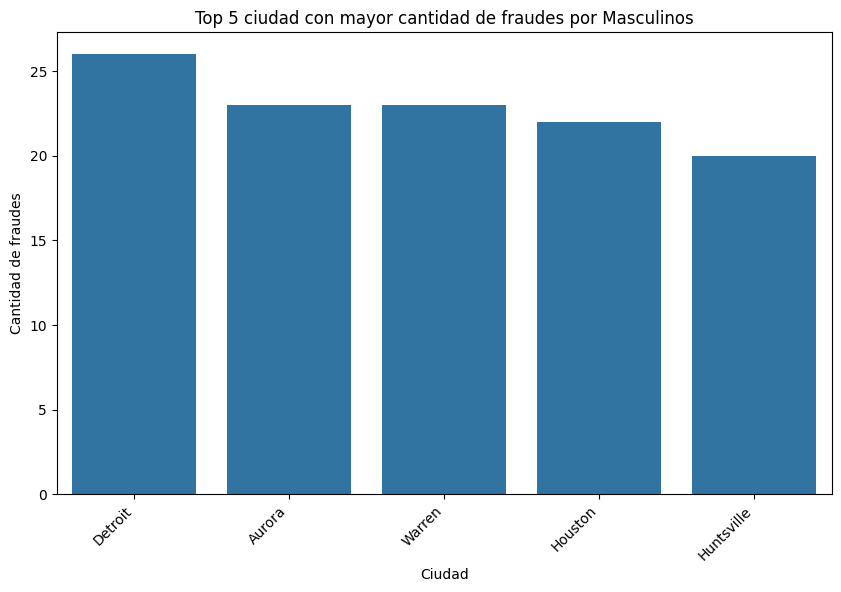

In [ ]:
# Filtro por cantidad de fraudes por Masculinos
Fraude_Masculino = df[(df['Genero'] == 'M') & (df['Fraude'] == 1)]

# Cantidad de Fraudes por ciudad
Cantidad_Fraudes_Ciudad = Fraude_Masculino.groupby('Ciudad')['Fraude'].sum().sort_values(ascending=False)

# Top 5 Ciudades
top_5_ciudades = Cantidad_Fraudes_Ciudad.head(5)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_ciudades.index, y=top_5_ciudades.values)
plt.title('Top 5 ciudad con mayor cantidad de fraudes por Masculinos')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de fraudes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Filtro el DataFrame por masculinos que cometieron fraudes en Washington
washington_m_fraude = df[(df['Genero'] == 'M') & (df['Estado'] == 'WA') & (df['Fraude'] == 1)]

# Cantidad de masculinos que cometieron fraude en Washington
num_washington_m_fraude = len(washington_m_fraude)

print(f"Cantidad de masculinos que cometieron fraude en Washington: {num_washington_m_fraude}")

Cantidad de masculinos que cometieron fraude en Washington: 15


In [ ]:
# Filtro el DataFrame por femeninos que cometieron fraudes en Washington
washington_f_fraude = df[(df['Genero'] == 'F') & (df['Estado'] == 'WA') & (df['Fraude'] == 1)]

# Cantidad de femeninos que cometieron fraude en Washington
num_washington_f_fraude = len(washington_f_fraude)

print(f"Cantidad de femeninos que cometieron fraude en Washington: {num_washington_f_fraude}")

Cantidad de femeninos que cometieron fraude en Washington: 54


Conclusion:
Se puede ver a que Washington no entra en el top 5 de ciudades con mayor cantidad de fraudes cometidos por gente del sexo masculino, y es mas en Washigton hay mayor cantidad de freudes cometidos por gente del sexo femenino (54) que masculino (15)


Segunda Hipotesis:
Los que trabajan en Accounting technician son los que mas fraudes cometen

In [ ]:
# Filtrar el DataFrame para incluir solo las filas donde 'Fraude' es 1
fraudes = df[df['Fraude'] == 1]

# Obtener la cantidad de filas en el DataFrame filtrado
cantidad_fraudes = len(fraudes)

# Imprimir la cantidad de fraudes
print(f"Cantidad de fraudes cometidos: {cantidad_fraudes}")

Cantidad de fraudes cometidos: 6006


In [ ]:
# Filtrar el DataFrame para incluir solo las filas donde 'Fraude' es 1 y 'Trabajo Cliente' es 'Accounting technician'
fraudes_accounting_technician = df[(df['Fraude'] == 1) & (df['Trabajo Cliente'] == 'Accounting technician')]

# Obtener la cantidad de filas en el DataFrame filtrado
cantidad_fraudes_accounting_technician = len(fraudes_accounting_technician)

# Imprimir la cantidad de fraudes
print(f"Cantidad de fraudes cometidos por Accounting technician: {cantidad_fraudes_accounting_technician}")

Cantidad de fraudes cometidos por Accounting technician: 21


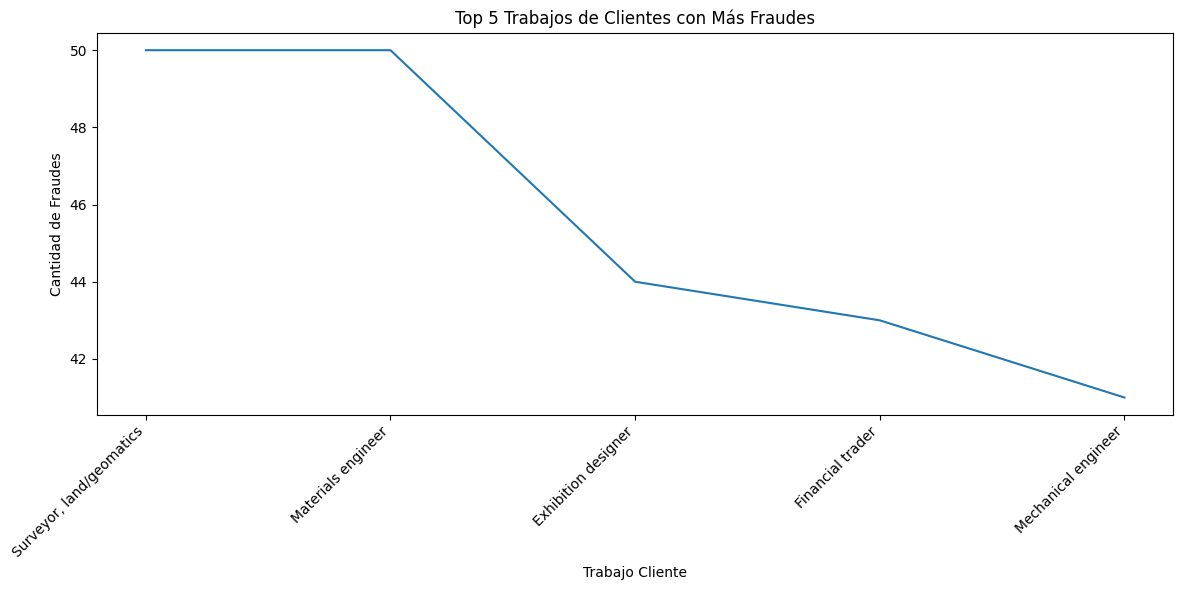

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtro el DataFrame para incluir solo las filas donde 'Fraude' es 1
fraudes = df[df['Fraude'] == 1]

# Agrupo por 'Trabajo Cliente' y contar la cantidad de fraudes
trabajo_fraudes = fraudes.groupby('Trabajo Cliente')['Fraude'].count().reset_index()

# Ordenar por cantidad de fraudes en orden descendente
trabajo_fraudes = trabajo_fraudes.sort_values(by=['Fraude'], ascending=False)

# Tomar los 5 trabajos con más fraudes
top_5_trabajos = trabajo_fraudes.head(5)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.lineplot(x='Trabajo Cliente', y='Fraude', data=top_5_trabajos)
plt.title('Top 5 Trabajos de Clientes con Más Fraudes')
plt.xlabel('Trabajo Cliente')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusion:

Se puede ver que la gente que trabaja de accouting technician no estan ni siquiera dentro del top 5 de los trabajos de clientes que mas fraudes cometen, por lo tanto esta hipotesis es falsa

Tercera Hipotesis:
Los comercios de categoria shopping_pos son los que sufren mas cantidad de fraudes

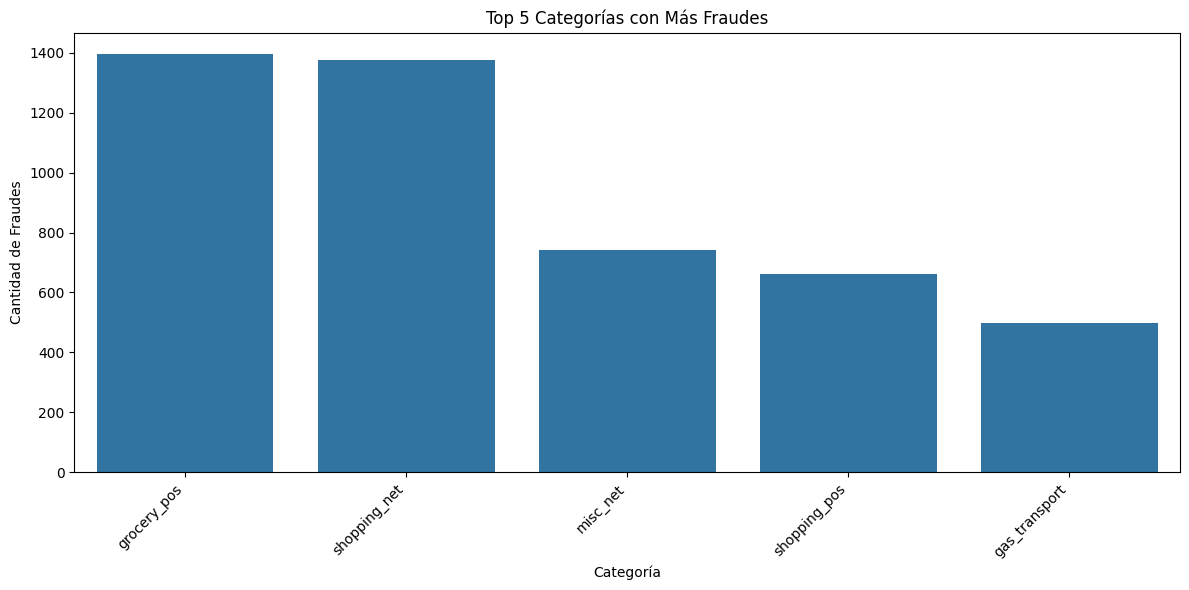

In [ ]:
# Filtro el DataFrame para incluir solo las filas donde 'Fraude' es 1
fraudes = df[df['Fraude'] == 1]

# Agrupo por 'Categoria' y contar la cantidad de fraudes
categoria_fraudes = fraudes.groupby('Categoria')['Fraude'].count().reset_index()

# Ordeno por cantidad de fraudes en orden descendente
categoria_fraudes = categoria_fraudes.sort_values(by=['Fraude'], ascending=False)

# Tomo las 5 categorías con más fraudes
top_5_categorias = categoria_fraudes.head(5)

# Creo el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoria', y='Fraude', data=top_5_categorias)
plt.title('Top 5 Categorías con Más Fraudes')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar el DataFrame para incluir solo las filas donde 'Fraude' es 1 y 'Categoria' es 'shopping_pos'
fraudes_shopping_pos = df[(df['Fraude'] == 1) & (df['Categoria'] == 'shopping_pos')]

# Obtener la cantidad de filas en el DataFrame filtrado
cantidad_fraudes_shopping_pos = len(fraudes_shopping_pos)

# Imprimir la cantidad de fraudes
print(f"Cantidad de fraudes que sufrio los comercios de shopping_pos: {cantidad_fraudes_shopping_pos}")

Cantidad de fraudes que sufrio los comercios de shopping_pos: 662


In [ ]:
# Filtrar el DataFrame para incluir solo las filas donde 'Fraude' es 1 y 'Categoria' es 'grocery_pos'
fraudes_grocery_pos = df[(df['Fraude'] == 1) & (df['Categoria'] == 'grocery_pos')]

# Obtener la cantidad de filas en el DataFrame filtrado
cantidad_fraudes_grocery_pos = len(fraudes_grocery_pos)

# Imprimir la cantidad de fraudes
print(f"Cantidad de fraudes que sufrio los comercios de grocery_pos: {cantidad_fraudes_grocery_pos}")

Cantidad de fraudes que sufrio los comercios de grocery_pos: 1396


In [ ]:
num_categorias = df['Categoria'].nunique()

# Imprime el resultado
print(f"Número de categorías : {num_categorias}")

Número de categorías : 14


Conclusion:

Los comercio de shopping_pos no son los comercios que mas fraudes sufrieron, pero se encuentra dentro del top 5, sufrieron la mitad de los fraudes que los de grocery_pos.
Aunque no fueron los que mas cantida de fraudes sufrieron  estan en posicion cuarto dentro de 14 categorias de comercios.